In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Fundamentalist():
    def __init__(self, a=0, b=0, c=1):
        self.a=a
        self.b=b
        self.c=c
    
    def get_expectation(self, last_price):
        return self.a + self.b * last_price
    
class Naive():
    def __init__(self, a=0, b=1, c=0):
        self.a=a
        self.b=b
        self.c=c
    
    def get_expectation(self, last_price):
        return self.a + self.b * last_price
    
class Adaptive():
    def __init__(self, a=0, b=0, c=0.5, w=0.5):
        self.a=a
        self.b=b
        self.c=c
        self.w=w
        
        self.last_expectation = 0
        
    def get_expectation(self, last_price):
        self.last_expectation = self.last_expectation + self.w*(last_price - self.last_expectation)
        return self.last_expectation


class CobWebModel():
    def __init__(self, A=0, d=3/4, s=1, start_price=0, beta=1/2):
        self.A = A
        self.d = d
        self.s = s
        self.beta = beta
        
        self.agents = []
        self.fractions = []
        self.expectations = []
        
        self.prices = [start_price]
        
    def step(self):
        self.expectations.append(self.get_expectations())
        self.prices.append(self.get_new_price())
        self.fractions = self.get_new_fractions()
        
    
    def add_agent(self,agent, fraction):
        self.agents.append(agent)
        self.fractions.append(fraction)
        
    def get_expectations(self):
        return [agent.get_expectation(self.prices[-1]) for agent in self.agents]
        
    def get_new_price(self):
        return -1*(np.sum([self.s*self.fractions[i]*expectation for i, expectation in enumerate(self.expectations[-1])]) - self.A)/self.d
    
    def get_supply(self, expected_price):
        return self.s*expected_price
    
    def get_profit(self, expected_price, agent):
        supply = self.get_supply(expected_price)
        return supply*self.prices[-1] - 0.5*supply**2-agent.c
    
    def get_new_fractions(self):
        profits = [self.get_profit(self.expectations[-1][i], agent) for i,agent in enumerate(self.agents)]
        #print(profits)
        Z = np.sum([np.exp(self.beta*profit) for profit in profits])
        
        
        return [np.exp(self.beta*profit)/Z for profit in profits]

In [3]:
#init for naive and fundamentalist in equal starting fractions

cwmodel = CobWebModel(start_price = 20)

cwmodel.add_agent(Naive(), 0.5)
cwmodel.add_agent(Fundamentalist(), .5)

In [4]:
cwmodel.step()
print(cwmodel.fractions)
print(cwmodel.prices)

[7.616722446670189e-102, 1.0]
[20, -13.333333333333334]


In [5]:
# Question C2

In [6]:
cwmodel = CobWebModel(start_price = 0.1, beta=0, s=1.5)

cwmodel.add_agent(Naive(), .5)
cwmodel.add_agent(Fundamentalist(), .5)

In [7]:
for i in range(20):
    cwmodel.step()

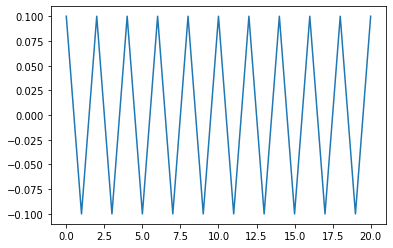

In [8]:
plt.plot(cwmodel.prices)

In [9]:
# question D

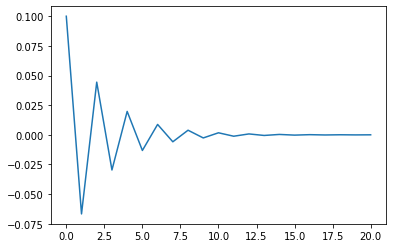

In [10]:
cwmodel = CobWebModel(start_price = 0.1, beta=0, s=1)

cwmodel.add_agent(Naive(), .5)
cwmodel.add_agent(Fundamentalist(), .5)

for i in range(20):
    cwmodel.step()

plt.plot(cwmodel.prices)

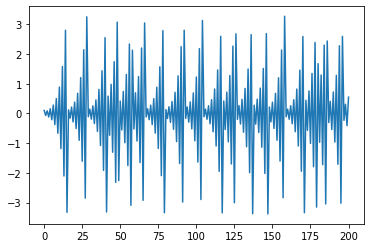

In [11]:
cwmodel = CobWebModel(start_price = 0.1, beta=3.322222/3, s=1)

cwmodel.add_agent(Naive(), .5)
cwmodel.add_agent(Fundamentalist(c=10), .5)

for i in range(200):
    cwmodel.step()

plt.plot(cwmodel.prices)

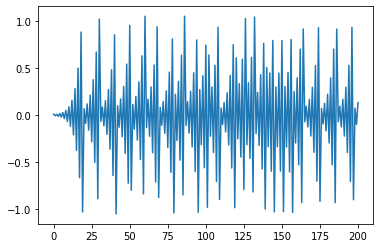

In [12]:
cwmodel = CobWebModel(start_price = 0.01, beta=10, s=1)

cwmodel.add_agent(Naive(), .5)
cwmodel.add_agent(Fundamentalist(), .5)

for i in range(200):
    cwmodel.step()

plt.plot(cwmodel.prices)

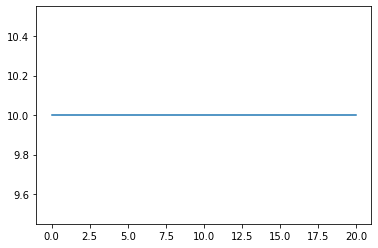

In [13]:
# check s = -b

cwmodel = CobWebModel(start_price = 10, beta=0, s=-0.75)

cwmodel.add_agent(Naive(), 1)
#cwmodel.add_agent(Fundamentalist(), 1)

for i in range(20):
    cwmodel.step()
    
plt.plot(cwmodel.prices)

In [14]:
cwmodel = CobWebModel(start_price = 20, beta=100)

cwmodel.add_agent(Naive(), 0.5)
cwmodel.add_agent(Fundamentalist(), .5)

In [15]:
for i in range(20):
    cwmodel.step()

In [16]:
1/5

0.2

In [17]:
3/(3+5)

0.375

In [18]:
3/(4+5)

0.3333333333333333

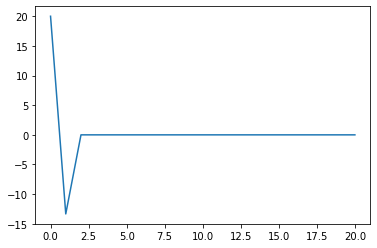

In [19]:
plt.plot(cwmodel.prices)

In [20]:
cwmodel = CobWebModel(start_price = 20, beta=1, s=1)

cwmodel.add_agent(Naive(), .5)
cwmodel.add_agent(Adaptive(w=0.9), .5)

In [21]:
for i in range(20):
    cwmodel.step()

C:\Users\sebas\AppData\Local\Temp/ipykernel_1220/3849974661.py:75: RuntimeWarning: invalid value encountered in double_scalars
  return [np.exp(self.beta*profit)/Z for profit in profits]


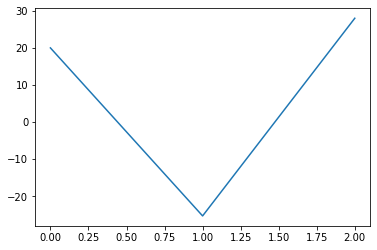

In [22]:
plt.plot(cwmodel.prices)

## E

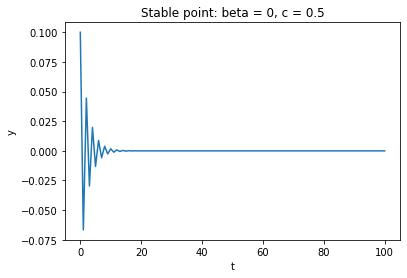

In [84]:
beta = 0
c = 0.5

cwmodel = CobWebModel(start_price = 0.1, beta=beta, s=1)
cwmodel.add_agent(Naive(), c)
cwmodel.add_agent(Fundamentalist(), .5)


for i in range(100):
    cwmodel.step()


plt.plot(cwmodel.prices)
plt.title(f"Stable point: beta = {beta}, c = 0.5")
plt.xlabel('t')
plt.ylabel('y')
plt.show()

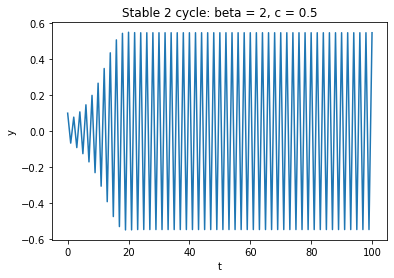

In [85]:
beta = 2
c = 0.5

cwmodel = CobWebModel(start_price = 0.1, beta=beta, s=1)
cwmodel.add_agent(Naive(), c)
cwmodel.add_agent(Fundamentalist(), .5)


for i in range(100):
    cwmodel.step()


plt.plot(cwmodel.prices)
plt.title(f"Stable 2 cycle: beta = {beta}, c = 0.5")
plt.xlabel('t')
plt.ylabel('y')
plt.show()

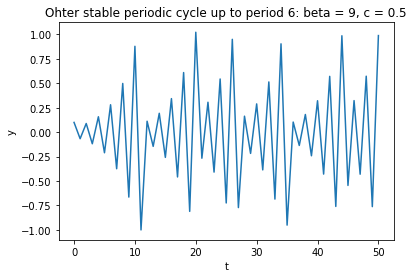

In [88]:
beta = 9
c = 0.5

cwmodel = CobWebModel(start_price = 0.1, beta=beta, s=1)
cwmodel.add_agent(Naive(), c)
cwmodel.add_agent(Fundamentalist(), .5)


for i in range(50):
    cwmodel.step()


plt.plot(cwmodel.prices)
plt.title(f"Ohter stable periodic cycle up to period 6: beta = {beta}, c = 0.5")
plt.xlabel('t')
plt.ylabel('y')
plt.show()

# F: Strange attractor

In [29]:
beta = 1
c = 0.5

cwmodel = CobWebModel(start_price = 0.1, beta=beta, s=1)
cwmodel.add_agent(Naive(), c)
cwmodel.add_agent(Fundamentalist(), .5)


for i in range(20):
    cwmodel.step()


In [61]:
betas = [0, 1,1.2, 1.4]
cc = [1,1.2, 1.3]

kanker = []

for ii in range(len(betas)):
    for j in range(len(c)):
        
        
        cwmodel = CobWebModel(start_price = 0.1, beta=betas[ii], s=1)
        cwmodel.add_agent(Naive(), cc[j])
        cwmodel.add_agent(Fundamentalist(), .5)


        for i in range(20):
            cwmodel.step()
            
        kanker.append([betas[ii], cc[j], cwmodel.prices[-1]])

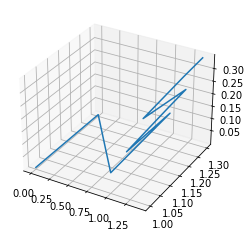

In [62]:
yes = np.array(kanker)
ax = plt.figure().add_subplot(projection = '3d')
ax.plot(yes.T[0], yes.T[1], yes.T[2])

In [46]:
yes

array([[1.        , 1.        , 0.07539441],
       [1.        , 1.2       , 0.08758042],
       [1.2       , 1.        , 0.17592892],
       [1.2       , 1.2       , 0.19763475]])

In [48]:
*yes.T

SyntaxError: can't use starred expression here (Temp/ipykernel_1220/189953850.py, line 1)

In [31]:
cwmodel.prices[-1]

0.04003443574401128

In [26]:
cwmodel = CobWebModel(start_price = 0.1, beta=1, s=1)

cwmodel.add_agent(Naive(), c1)
cwmodel.add_agent(Fundamentalist(), .5)

for i in range(20):
    cwmodel.step()

plt.plot(cwmodel.prices)

NameError: name 'c1' is not defined